In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold


In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.0', '2.1.3', '0.13.0', '3.8.1')

## 1. Load Data

In [3]:
df = pd.read_csv('cirrhosis.csv')
df.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [4]:
df.shape

(418, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


## 2. EDA & Pre Processing & Feature Engineering

In [7]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [8]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [9]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [10]:
# For Categorical type
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [11]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [12]:
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [13]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]
sum_of_duplicated_rows = duplicated_rows.groupby(duplicated_rows.columns.tolist()).size().reset_index(name='count')
print(sum_of_duplicated_rows)

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage, count]
Index: []

[0 rows x 21 columns]


In [14]:
df['AgeInYears'] = (df['Age'] / 365.25).round()

In [15]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,AgeInYears
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,59.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,56.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,70.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,55.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,38.0


In [16]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [17]:
# Count the number of patients in each stage
stage_counts = df['Stage'].value_counts()

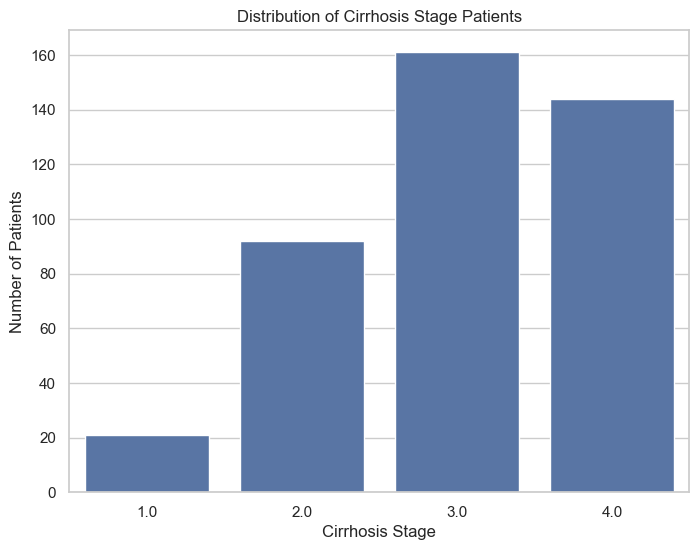

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.xlabel('Cirrhosis Stage')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cirrhosis Stage Patients')
plt.show()

<Axes: xlabel='Stage', ylabel='AgeInYears'>

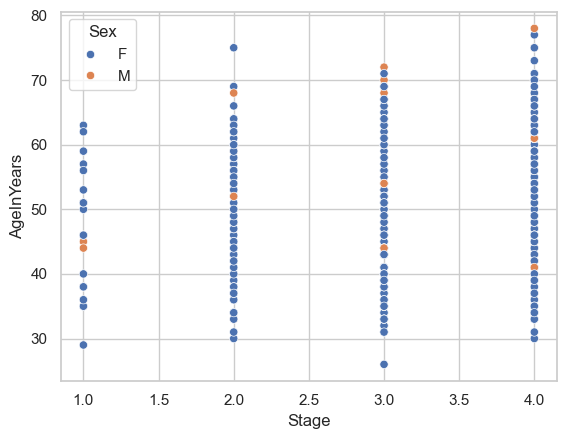

In [19]:
sns.scatterplot(x = df['Stage'], y = df['AgeInYears'], hue=df['Sex'])

<Axes: xlabel='Stage', ylabel='AgeInYears'>

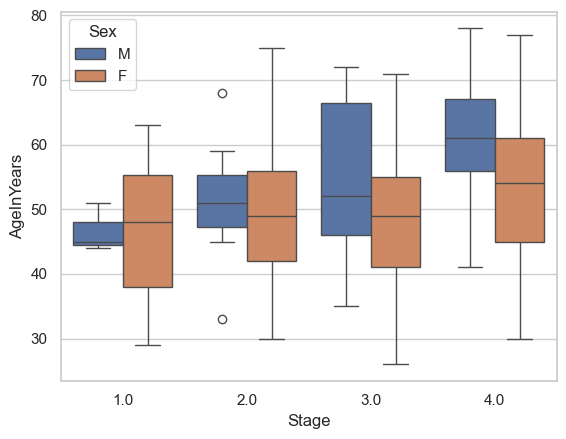

In [20]:
sns.boxplot(x = df['Stage'], y = df['AgeInYears'], hue=df['Sex'])

In [21]:
# Map stage 3 and 4 to 1, and stage 1 and 2 to 0
df['CirrhosisPatients'] = np.where((df['Stage'] == 3) | (df['Stage'] == 4), 1, 0)

In [22]:
cirrhosis_df = df[df['CirrhosisPatients'] == 1]
no_cirrhosis_df = df[df['CirrhosisPatients'] == 0]

<Axes: xlabel='CirrhosisPatients', ylabel='AgeInYears'>

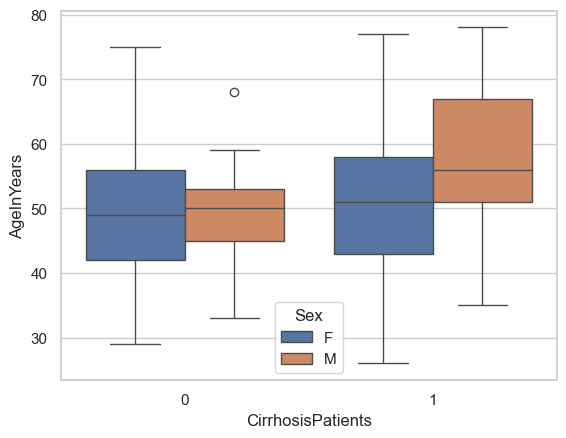

In [23]:
sns.boxplot(x = df['CirrhosisPatients'], y = df['AgeInYears'], hue=df['Sex'])

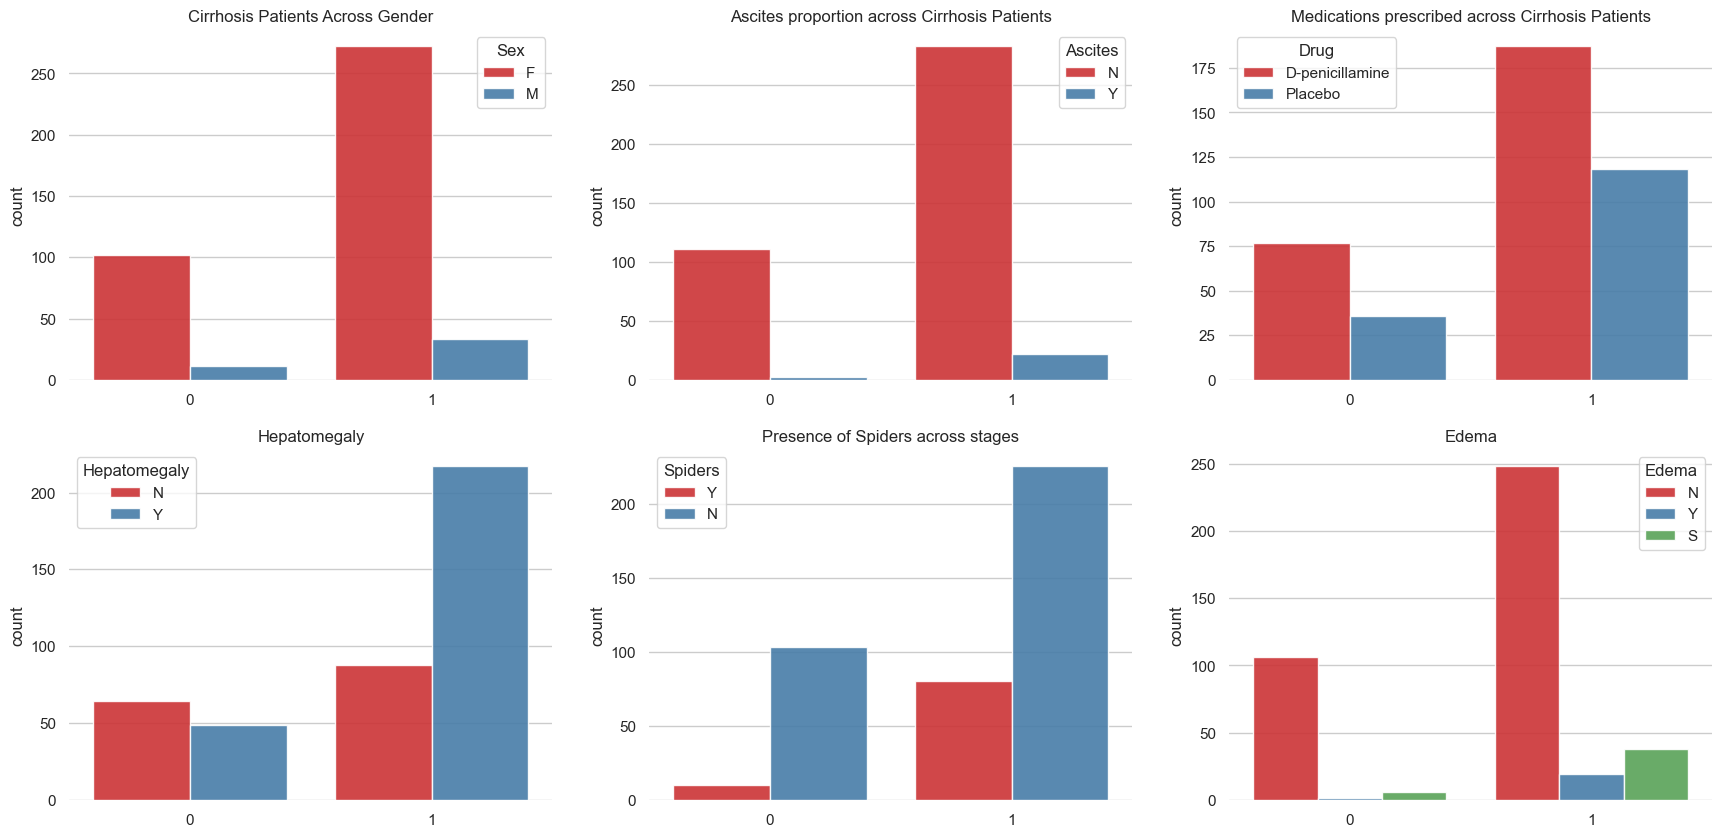

In [24]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Sex'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cirrhosis Patients Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Ascites'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Cirrhosis Patients')

plt.subplot(2,3,3)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Drug'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Cirrhosis Patients');

plt.subplot(2,3,4)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Hepatomegaly'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Spiders'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['CirrhosisPatients'], hue=df['Edema'], palette='Set1', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

In [25]:
df.loc[:, (df.columns != "Age")&(df.columns != "ID")&(df.columns != "Stage")]

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,AgeInYears,CirrhosisPatients
0,400,D,D-penicillamine,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,59.0,1
1,4500,C,D-penicillamine,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,56.0,1
2,1012,D,D-penicillamine,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,70.0,1
3,1925,D,D-penicillamine,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,55.0,1
4,1504,CL,Placebo,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,D-penicillamine,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,67.0,1
414,1103,C,D-penicillamine,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,39.0,1
415,1055,C,D-penicillamine,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,57.0,1
416,691,C,D-penicillamine,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,58.0,1


In [26]:
df.select_dtypes(exclude = ['object'])

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,AgeInYears,CirrhosisPatients
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,59.0,1
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,56.0,1
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,70.0,1
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,55.0,1
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,24472,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0,67.0,1
414,415,1103,14245,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0,39.0,1
415,416,1055,20819,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0,57.0,1
416,417,691,21185,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0,58.0,1


<Axes: >

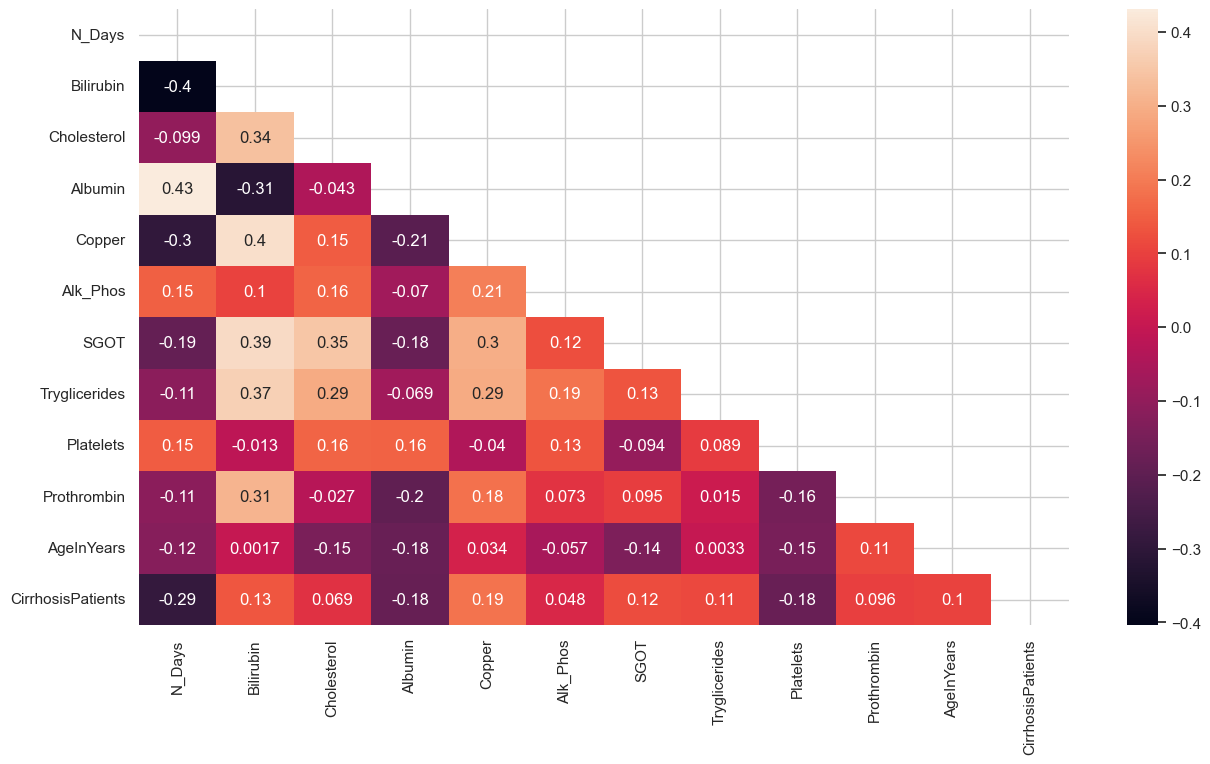

In [27]:
plt.figure(figsize = (15,8))

df_numerical = df.select_dtypes(exclude = ['object'])

corr = df_numerical.loc[:, (df_numerical.columns != "Age")&(df_numerical.columns != "ID")&(df_numerical.columns != "Stage")].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

<Axes: >

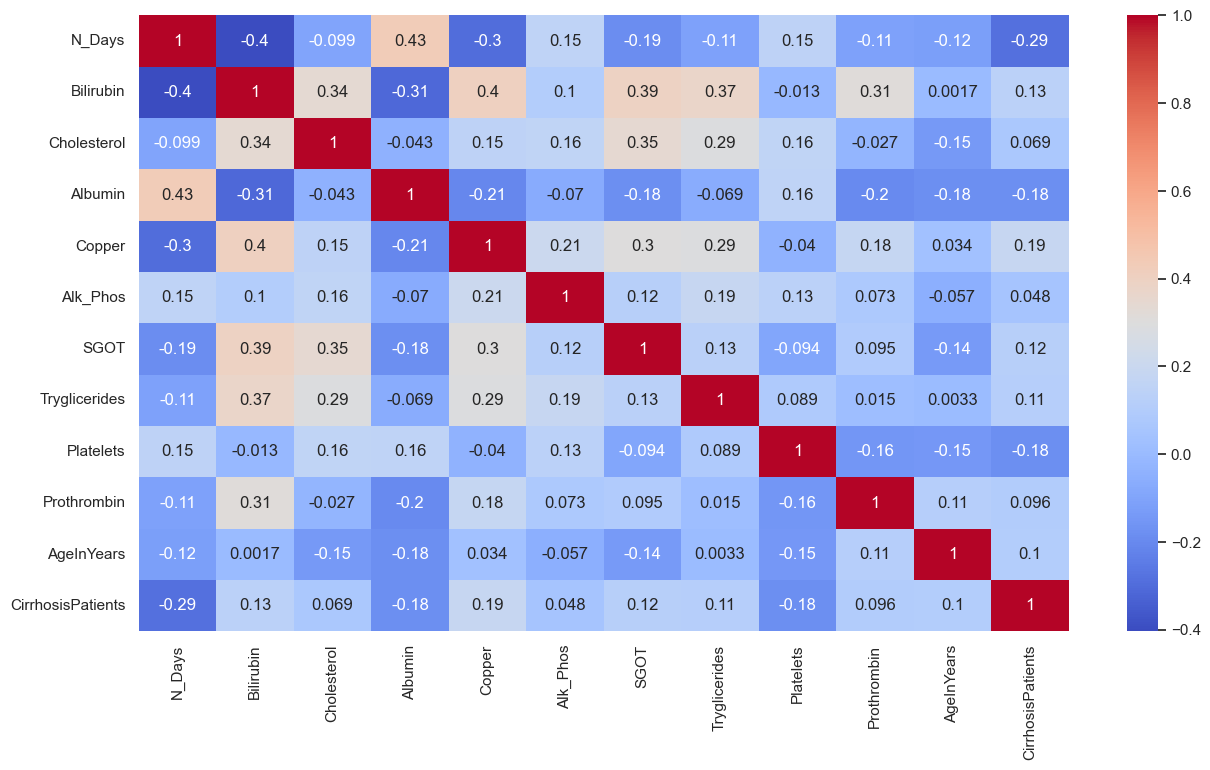

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [29]:
# df['Sex'] = df['Sex'].replace({'M':0, 'F':1})
# df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})
# df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1}) 
# df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})
# df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})

In [30]:
df = pd.get_dummies(df, columns=['Edema', 'Status'])

In [31]:
df.head(10)

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Prothrombin,Stage,AgeInYears,CirrhosisPatients,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,1,400,D-penicillamine,21464,F,Y,Y,Y,14.5,261.0,...,12.2,4.0,59.0,1,False,False,True,False,False,True
1,2,4500,D-penicillamine,20617,F,N,Y,Y,1.1,302.0,...,10.6,3.0,56.0,1,True,False,False,True,False,False
2,3,1012,D-penicillamine,25594,M,N,N,N,1.4,176.0,...,12.0,4.0,70.0,1,False,True,False,False,False,True
3,4,1925,D-penicillamine,19994,F,N,Y,Y,1.8,244.0,...,10.3,4.0,55.0,1,False,True,False,False,False,True
4,5,1504,Placebo,13918,F,N,Y,Y,3.4,279.0,...,10.9,3.0,38.0,1,True,False,False,False,True,False
5,6,2503,Placebo,24201,F,N,Y,N,0.8,248.0,...,11.0,3.0,66.0,1,True,False,False,False,False,True
6,7,1832,Placebo,20284,F,N,Y,N,1.0,322.0,...,9.7,3.0,56.0,1,True,False,False,True,False,False
7,8,2466,Placebo,19379,F,N,N,N,0.3,280.0,...,11.0,3.0,53.0,1,True,False,False,False,False,True
8,9,2400,D-penicillamine,15526,F,N,N,Y,3.2,562.0,...,11.0,2.0,43.0,0,True,False,False,False,False,True
9,10,51,Placebo,25772,F,Y,N,Y,12.6,200.0,...,11.5,4.0,71.0,1,False,False,True,False,False,True


In [32]:
df['CirrhosisPatients']

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: CirrhosisPatients, Length: 418, dtype: int32

In [33]:
df.columns

Index(['ID', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'AgeInYears', 'CirrhosisPatients', 'Edema_N', 'Edema_S', 'Edema_Y',
       'Status_C', 'Status_CL', 'Status_D'],
      dtype='object')

In [34]:
df['CirrhosisPatients'].value_counts()

CirrhosisPatients
1    305
0    113
Name: count, dtype: int64

In [35]:
#Balance the y

condY = df.CirrhosisPatients == 1  #to 0 or 1
condN = df.CirrhosisPatients == 0

df_Y = df[condY].sample(n=300, random_state=999)
df_N = df[condN] #also 113

df = pd.concat([df_Y, df_N])

df.CirrhosisPatients.value_counts()

CirrhosisPatients
1    300
0    113
Name: count, dtype: int64

## 3. Feature Selection

In [36]:
X = df[['Drug', 'AgeInYears', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N','Edema_S', 'Edema_Y', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']]
y = df['CirrhosisPatients']

In [39]:
from imblearn.over_sampling import SMOTENC

In [41]:
cat_cols = ['Sex', 'Ascites', 'Drug', 'Hepatomegaly', 'Spiders']
smote = SMOTENC(categorical_features=cat_cols)
X, y = smote.fit_resample(X, y)

In [43]:
y.value_counts()

CirrhosisPatients
1    300
0    300
Name: count, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
X_train.isna().sum()

Drug             0
AgeInYears       0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema_N          0
Edema_S          0
Edema_Y          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [46]:
X_train.columns

Index(['Drug', 'AgeInYears', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema_N', 'Edema_S', 'Edema_Y', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin'],
      dtype='object')

In [47]:
y_train.value_counts()

CirrhosisPatients
0    218
1    202
Name: count, dtype: int64

In [48]:
# Function for finding each column unique values
def cols_unique(columns):
  for col in columns:
    print(f"{col}: {X_train[col].unique()}\n")

In [49]:
cols_unique(X_train)

Drug: ['D-penicillamine' 'Placebo']

AgeInYears: [35.         64.         61.46273023 55.56849067 54.40168279 43.
 62.         53.71955324 48.         39.         46.21604974 45.41118594
 57.         51.         69.         53.67179456 55.         33.
 75.         43.09518247 38.28450412 49.         50.         39.09652207
 43.29225582 46.35309323 51.81865424 59.         67.         47.
 71.         48.37245791 53.         50.02056628 45.         52.84917914
 41.         50.02468374 53.91262348 35.18577278 60.         31.703699
 38.         39.33387056 42.         56.         52.         49.04030695
 50.60198663 46.         63.         43.27495979 29.         55.51101895
 35.27987914 44.         34.         54.         51.03571192 45.86497291
 57.40048852 44.63001214 48.32113754 56.25370515 55.58607028 70.
 48.65860122 61.         40.90262845 62.91605154 39.99161847 54.7823022
 45.37174825 37.         47.26151349 60.19286831 41.31682419 45.57768121
 36.         45.9590851  31.         

In [50]:
X_test

,Drug,AgeInYears,Sex,Ascites,Hepatomegaly,Spiders,Edema_N,Edema_S,Edema_Y,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
110,Placebo,46.000000,F,N,Y,N,True,False,False,4.500000,372.000000,3.380000,227.000000,2310.000000,167.400000,135.000000,240.000000,12.400000
419,D-penicillamine,41.786871,F,N,Y,N,True,False,False,0.589344,233.312591,3.479838,52.636545,1319.388176,72.252730,133.980960,437.256891,10.248906
565,D-penicillamine,56.676901,F,N,N,N,True,False,False,0.893198,247.625885,3.952315,169.449217,646.476146,61.931979,84.017005,128.425131,10.094898
77,D-penicillamine,53.000000,F,N,Y,Y,True,False,False,5.000000,1600.000000,3.210000,75.000000,2656.000000,82.150000,174.000000,181.000000,10.900000
181,Placebo,43.000000,F,N,Y,N,True,False,False,2.800000,322.000000,3.060000,65.000000,2562.000000,91.000000,209.000000,231.000000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,D-penicillamine,54.000000,F,Y,Y,Y,True,False,False,1.200000,269.000000,3.120000,73.000000,1441.000000,165.850000,68.000000,166.000000,11.100000
493,D-penicillamine,51.149456,F,N,Y,N,True,False,False,3.280436,309.500000,3.904058,73.000000,1259.000000,114.700000,108.000000,251.000000,9.439492
46,D-penicillamine,59.000000,F,Y,Y,Y,False,False,True,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000
93,D-penicillamine,58.000000,F,N,Y,N,True,False,False,3.000000,309.500000,3.460000,73.000000,1259.000000,114.700000,108.000000,109.000000,10.400000


In [ ]:
# df['Sex'] = df['Sex'].replace({'M':0, 'F':1})
# df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})
# df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1}) 
# df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})
# df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})

## 4. Model Selection

In [89]:
# Standardization and Scaling
num_cols = ['AgeInYears', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
enc_cols = ['Sex', 'Ascites', 'Drug', 'Hepatomegaly', 'Spiders']

remainder_transformer = 'passthrough'

scaler_encoder = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), num_cols),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown="error"), enc_cols)
    ],
    remainder=remainder_transformer,
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [90]:
# Discretization
column_to_discretize = 'AgeInYears'

remainder_transformer = 'passthrough'
binner = ColumnTransformer(
    transformers=[
        ('binning', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), [column_to_discretize])
    ],
    remainder=remainder_transformer,
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [91]:
#Prediction
model = XGBClassifier(learning_rate=0.8, max_depth=3, random_state=1, gamma=0, eval_metric='error')

In [92]:
pipeline = Pipeline([
    ('scaling', scaler_encoder),
    ('discretization', binner),
    ('prediction', model)])

In [93]:
# Cross-validation loop
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
acc = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    pipeline.fit(X_train_cv, y_train_cv)
    score = pipeline.score(X_test_cv, np.ravel(y_test_cv))
    acc.append(score)
    print(f'For Fold {len(acc)} the accuracy is {score}')
    
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.7142857142857143
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.7380952380952381
For Fold 4 the accuracy is 0.7142857142857143
For Fold 5 the accuracy is 0.7142857142857143
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.8333333333333334
For Fold 9 the accuracy is 0.7619047619047619
For Fold 10 the accuracy is 0.8095238095238095

XGboost model Mean Accuracy =  0.7404761904761905


In [94]:
# Tried another model
models = [
    ('Logistic', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Number of splits for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define parameter grids for each model
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, 20]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    'Logistic': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'Decision Tree': {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]},
    'Naive Bayes': {}  # No hyperparameters to tune for Gaussian Naive Bayes
}

In [95]:
# Results dictionary to store the best parameters and scores
results = {}

# Best models and their parameters
best_models = {}

# Perform grid search for each model
for model_name, model in models:
    parameters = param_grid[model_name]
    parameters = {"prediction__" + str(key): val for key, val in parameters.items()}

    pipeline = Pipeline([
    ('scaling', scaler_encoder),
    ('discretization', binner),
    ('prediction', model)])

    # Grid search for mean squared error
    grid_search_acc = GridSearchCV(pipeline, parameters, cv=kf, scoring='accuracy')
    grid_search_acc.fit(X_train, y_train)

    # Grid search for R²
    grid_search_f1 = GridSearchCV(pipeline, parameters, cv=kf, scoring='f1')
    grid_search_f1.fit(X_train, y_train)

    # Store the best parameters and scores
    results[model_name] = {
        'Best Parameters (Accuracy)': grid_search_acc.best_params_,
        'Best Mean Accuracy': (grid_search_acc.best_score_),
        'Best Parameters (F1)': grid_search_f1.best_params_,
        'Best F1': grid_search_f1.best_score_
    }

    # Store the best model
    best_models[model_name] = grid_search_acc.best_estimator_

# Print the information of all models
for model_name, result in results.items():
    print(f"{model_name} - Best Parameters (Accuracy): {result['Best Parameters (Accuracy)']}; Best Mean Accuracy: {result['Best Mean Accuracy']}; Best Parameters (F1): {result['Best Parameters (F1)']}; Best F1: {result['Best F1']}")

# Identify the best model based on R² or another metric
best_model_name = max(results, key=lambda key: results[key]['Best F1'])
best_model = best_models[best_model_name]

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

Logistic - Best Parameters (Accuracy): {'prediction__C': 10, 'prediction__penalty': 'l2'}; Best Mean Accuracy: 0.730952380952381; Best Parameters (F1): {'prediction__C': 10, 'prediction__penalty': 'l2'}; Best F1: 0.7075844226579522
Decision Tree - Best Parameters (Accuracy): {'prediction__max_depth': 7, 'prediction__min_samples_split': 10}; Best Mean Accuracy: 0.6714285714285715; Best Parameters (F1): {'prediction__max_depth': 7, 'prediction__min_samples_split': 10}; Best F1: 0.6445784201678977
Naive Bayes - Best Parameters (Accuracy): {}; Best Mean Accuracy: 0.6714285714285715; Best Parameters (F1): {}; Best F1: 0.543862559975236
Random Forest - Best Parameters (Accuracy): {'prediction__max_depth': 10, 'prediction__n_estimators': 100}; Best Mean Accuracy: 0.7571428571428571; Best Parameters (F1): {'prediction__max_depth': 10, 'prediction__n_estimators': 100}; Best F1: 0.7327230282859948
Support Vector Machine - Best Parameters (Accuracy): {'prediction__C': 1, 'prediction__kernel': 'li

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['AgeInYears', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'Ascites', 'Drug',
                                                   'Hepatomegaly',
                                                   'Spiders'])],
                                   verbose_feature_names_out=False)),
                ('discretization',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4,
                                                                   strategy='uniform'),
                                                  ['AgeInYears'])],
                                   verbose_feature_names_out=False)),
                ('prediction', RandomForestClassifier(max_depth=10))])

RandomForest has the best accuracy around 0.7571428571428571

In [69]:
import pickle
import joblib

In [98]:
pickle.dump(best_model, open('best_model.pkl', 'wb+'))

In [99]:
best_model2 = pickle.load(open('best_model.pkl', 'rb+'))

In [100]:
best_model2.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0])

## 5.Testing

In [101]:
y_pred = best_model2.predict(X_test)
from sklearn.metrics import classification_report

yhat = best_model2.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.68      0.79      0.73        82
           1       0.80      0.68      0.74        98

    accuracy                           0.73       180
   macro avg       0.74      0.74      0.73       180
weighted avg       0.74      0.73      0.73       180



## 6. Analysis: Feature Importance

In [102]:
column = X_train.columns

In [103]:
forest_model = best_model['prediction']  # No need for named_steps
display(forest_model.feature_importances_)

array([0.06482454, 0.10797968, 0.06177384, 0.11477852, 0.06423155,
       0.06442459, 0.07704057, 0.07566153, 0.1198367 , 0.0830192 ,
       0.00793239, 0.00183802, 0.0237601 , 0.04960886, 0.04336769,
       0.0302372 , 0.00820784, 0.00147718])

In [104]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': forest_model.feature_importances_
})

# Display the DataFrame
display(feature_importance_df)


,Feature,Importance
0,Drug,0.064825
1,AgeInYears,0.107980
2,Sex,0.061774
3,Ascites,0.114779
4,Hepatomegaly,0.064232
5,Spiders,0.064425
6,Edema_N,0.077041
7,Edema_S,0.075662
8,Edema_Y,0.119837
9,Bilirubin,0.083019


In [105]:
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(sorted_feature_importance_df)

,Feature,Importance
8,Edema_Y,0.119837
3,Ascites,0.114779
1,AgeInYears,0.107980
9,Bilirubin,0.083019
6,Edema_N,0.077041
7,Edema_S,0.075662
0,Drug,0.064825
5,Spiders,0.064425
4,Hepatomegaly,0.064232
2,Sex,0.061774


# 7.Inference

In [106]:
best_model3 = pickle.load(open('best_model.pkl', 'rb+')) # Load model 

In [107]:
print(X_test.iloc[1:3,]) # Get some sample

                Drug  AgeInYears Sex Ascites Hepatomegaly Spiders  Edema_N  \
419  D-penicillamine   41.786871   F       N            Y       N     True   
565  D-penicillamine   56.676901   F       N            N       N     True   

     Edema_S  Edema_Y  Bilirubin  Cholesterol   Albumin      Copper  \
419    False    False   0.589344   233.312591  3.479838   52.636545   
565    False    False   0.893198   247.625885  3.952315  169.449217   

        Alk_Phos       SGOT  Tryglicerides   Platelets  Prothrombin  
419  1319.388176  72.252730     133.980960  437.256891    10.248906  
565   646.476146  61.931979      84.017005  128.425131    10.094898  


In [108]:
y_test.iloc[1:3,]

419    0
565    0
Name: CirrhosisPatients, dtype: int32

In [109]:
best_model3.predict(X_test.iloc[1:3,])

array([0, 0])

In [80]:
import sklearn
sklearn.__version__

'1.3.1'

In [81]:
import dash
dash.__version__

'2.14.1'

In [82]:
pd.__version__

'2.1.3'

In [83]:
import flask
flask.__version__

'2.3.3'